In [15]:
%pythonimport pandas as pdimport matplotlib.pyplot as pltimport numpy as npimport oml

In [16]:
%pythonoml_df = oml.sync(table = "PIMADATA", schema = "OMLUSER1")print(type(oml_df))oml_df.describe()

<class 'oml.core.frame.DataFrame'>
       PREGNANCIES     GLUCOSE  ...         AGE        SKIN
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.809136
std       3.369578   31.972618  ...   11.760232    0.628517
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.906200
75%       6.000000  140.250000  ...   41.000000    1.260800
max      17.000000  199.000000  ...   81.000000    3.900600

[8 rows x 9 columns]


In [12]:
%python#Create a Pandas dataframedf=oml_df.pull()print(type(df))df.describe()

<class 'pandas.core.frame.DataFrame'>
       PREGNANCIES     GLUCOSE  ...         AGE        SKIN
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.809136
std       3.369578   31.972618  ...   11.760232    0.628517
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.906200
75%       6.000000  140.250000  ...   41.000000    1.260800
max      17.000000  199.000000  ...   81.000000    3.900600

[8 rows x 9 columns]


In [17]:
%pythondf['DIABETESOUTCOME'] = df['DIABETESOUTCOME'].replace({'TRUE': True, 'FALSE': False}).astype(bool)df.head(5)

   PREGNANCIES  GLUCOSE  BLOODPRESSURE  ...  AGE    SKIN  DIABETESOUTCOME
0            6      148             72  ...   50  1.3790             True
1            1       85             66  ...   31  1.1426            False
2            8      183             64  ...   32  0.0000             True
3            1       89             66  ...   21  0.9062            False
4            0      137             40  ...   33  1.3790             True

[5 rows x 10 columns]


In [7]:
%pythondf.tail(5)

     PREGNANCIES  GLUCOSE  BLOODPRESSURE  ...  AGE    SKIN  DIABETESOUTCOME
763            2       81             60  ...   25  0.8668            False
764            0      147             85  ...   24  2.1276            False
765            7      179             95  ...   60  1.2214            False
766            0      140             65  ...   24  1.0244             True
767            9      112             82  ...   36  1.2608             True

[5 rows x 10 columns]


## Check for null values

In [7]:
%pythondf.isnull().values.any()

False



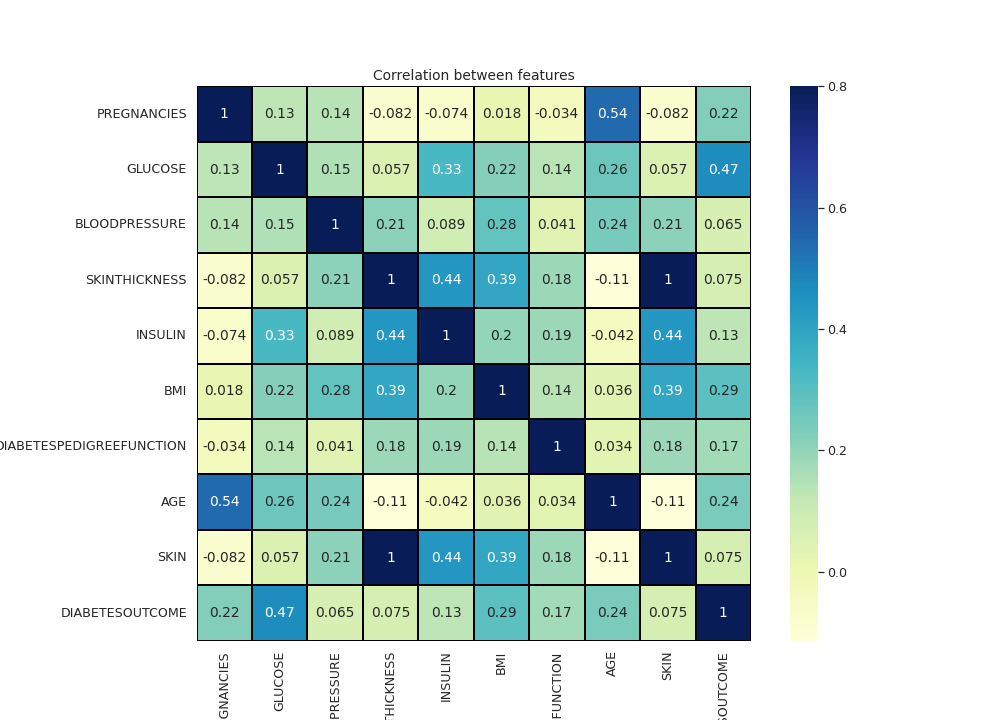

In [9]:
%pythonimport seaborn as sns#Function to draw a heatmap of the Coorelation of features using Seaborndef plot_corr(df):    corr=df.corr()        sns.set(font_scale=1.15)    plt.figure(figsize=(14,10))    sns.heatmap(corr,vmax=.8, linewidths=0.01,           square=True,annot=True,cmap='YlGnBu', linecolor="black")    plt.title('Correlation between features');plot_corr(df)

In [8]:
%pythondel df['SKIN'] # Remove the Skin feature as its highly corelated with SkinThicknessdf.head(5)

   PREGNANCIES  GLUCOSE  ...  AGE  DIABETESOUTCOME
0            6      148  ...   50             True
1            1       85  ...   31            False
2            8      183  ...   32             True
3            1       89  ...   21            False
4            0      137  ...   33             True

[5 rows x 9 columns]


In [9]:
%pythondiabetes_map={True:1,False:0}df['DIABETESOUTCOME']=df['DIABETESOUTCOME'].map(diabetes_map)df.head(5)

   PREGNANCIES  GLUCOSE  ...  AGE  DIABETESOUTCOME
0            6      148  ...   50                1
1            1       85  ...   31                0
2            8      183  ...   32                1
3            1       89  ...   21                0
4            0      137  ...   33                1

[5 rows x 9 columns]


# Predictive Modelling

In [4]:
%pythonfrom sklearn.metrics import accuracy_scorefrom sklearn.metrics import classification_reportfrom sklearn.metrics import confusion_matrixfrom sklearn.model_selection import train_test_splitfrom sklearn.linear_model import LogisticRegressionfrom sklearn.tree import DecisionTreeClassifierfrom sklearn.ensemble import GradientBoostingClassifierfrom sklearn.naive_bayes import GaussianNB

## Splitting the data70% for training, 30% for testing

In [4]:
%pythonfeatures_col_names=['PREGNANCIES','GLUCOSE','BLOODPRESSURE','SKINTHICKNESS','INSULIN','BMI','DIABETESPEDIGREEFUNCTION','AGE']predicted_class_names=['DIABETESOUTCOME']X=df[features_col_names].values       #predictor feature columns (8xm)y=df[predicted_class_names].values    #predicted class (1=true, 0=false) column (1xm)X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

## Naive Bayes

In [4]:
%python#Create Gaussian Naive Bayes model object and train it with datanb_model=GaussianNB()nb_model.fit(X_train,y_train.flatten())#predict values using the training datanb_predict_train =nb_model.predict(X_train)#Accuracyprint("Training data Accuracy: {0:.4f}".format(accuracy_score(y_train,nb_predict_train)*100))print()#Predict values using the testing datanb_predict_test=nb_model.predict(X_test)#training metricsprint("Testing data Accuracy: {0:.4f}".format(accuracy_score(y_test,nb_predict_test)*100))print()print("Confusion Matrix")print("{0}".format(confusion_matrix(y_test,nb_predict_test)))print()print("Classification Report")print(classification_report(y_test,nb_predict_test))

Training data Accuracy: 79.7020

Testing data Accuracy: 68.8312

Confusion Matrix
[[113  33]
 [ 39  46]]

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       146
           1       0.58      0.54      0.56        85

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.68      0.69      0.69       231



### Random Forest

In [4]:
%pythonfrom sklearn.ensemble import RandomForestClassifierrf_model=RandomForestClassifier(random_state=42, n_estimators=10)rf_model.fit(X_train,y_train.flatten())rf_predict_train=rf_model.predict(X_train)#training metricsprint("Training data Accuracy: {0:.4f}".format(accuracy_score(y_train,rf_predict_train)*100))rf_predict_test=rf_model.predict(X_test)#training metricsprint("Testing data Accuracy: {0:.4f}".format(accuracy_score(y_test,rf_predict_test)*100))print("Confusion Matrix")print("{0}".format(confusion_matrix(y_test,rf_predict_test)))print()print("Classification Report")print(classification_report(y_test,rf_predict_test))

Training data Accuracy: 98.8827
Testing data Accuracy: 70.5628
Confusion Matrix
[[124  22]
 [ 46  39]]

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.85      0.78       146
           1       0.64      0.46      0.53        85

    accuracy                           0.71       231
   macro avg       0.68      0.65      0.66       231
weighted avg       0.70      0.71      0.69       231



### Logistic Regression

In [4]:
%pythonfrom sklearn.linear_model import LogisticRegressionlr_model=LogisticRegression(C=0.7,random_state=42, solver='liblinear', max_iter=10000)lr_model.fit(X_train,y_train.flatten())lr_predict_train=lr_model.predict(X_train)lr_predict_test=lr_model.predict(X_test)#training metricsprint("Testing data Accuracy: {0:.4f}".format(accuracy_score(y_train,lr_predict_train)*100))print()#Testing metricsprint("Testing data Accuracy: {0:.4f}".format(accuracy_score(y_test,lr_predict_test)*100))print()print("Confusion Matrix")print("{0}".format(confusion_matrix(y_test,lr_predict_test)))print()print("Classification Report")print(classification_report(y_test,lr_predict_test))

Testing data Accuracy: 79.7020

Testing data Accuracy: 70.1299

Confusion Matrix
[[125  21]
 [ 48  37]]

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       146
           1       0.64      0.44      0.52        85

    accuracy                           0.70       231
   macro avg       0.68      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



## Gradient Boosting

In [4]:
%python#Modelgb_model = GradientBoostingClassifier()#fiting the modelgb_model.fit(X_train, y_train.flatten())#predictiongb_predict_train=gb_model.predict(X_train)gb_predict_test = gb_model.predict(X_test)#training metricsprint("Testing data Accuracy: {0:.4f}".format(accuracy_score(y_train,gb_predict_train)*100))print()#Testing metricsprint("Testing data Accuracy: {0:.4f}".format(accuracy_score(y_test,gb_predict_test)*100))print()print("Confusion Matrix")print("{0}".format(confusion_matrix(y_test,gb_predict_test)))print()print("Classification Report")print(classification_report(y_test,gb_predict_test))

Testing data Accuracy: 94.5996

Testing data Accuracy: 67.9654

Confusion Matrix
[[110  36]
 [ 38  47]]

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       146
           1       0.57      0.55      0.56        85

    accuracy                           0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.68      0.68       231

